In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google_play_scraper import reviews_all, Sort

app_id = 'com.velox.hkmc_tm1k'  
reviews = reviews_all(
    app_id,
    lang='ko',  
    country='kr', 
    sort=Sort.NEWEST  
)

# 데이터프레임 생성
df = pd.DataFrame(reviews)
df.to_csv('reviews.csv', index=False)

# 리뷰 분류
positive_reviews = df[df['score'] == 5].head(1000)
neutral_reviews = df[df['score'].isin([3, 4])].head(1000)
negative_reviews = df[df['score'].isin([1, 2])].head(1000)

In [2]:
import re
from nltk.corpus import stopwords

# NLTK 불용어 다운로드 (최초 1회 실행 필요)
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        max_words=200,
        background_color='white',
        font_path='/System/Library/Fonts/Supplemental/AppleSDGothicNeo.ttc'  # 한글 폰트 경로 설정
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

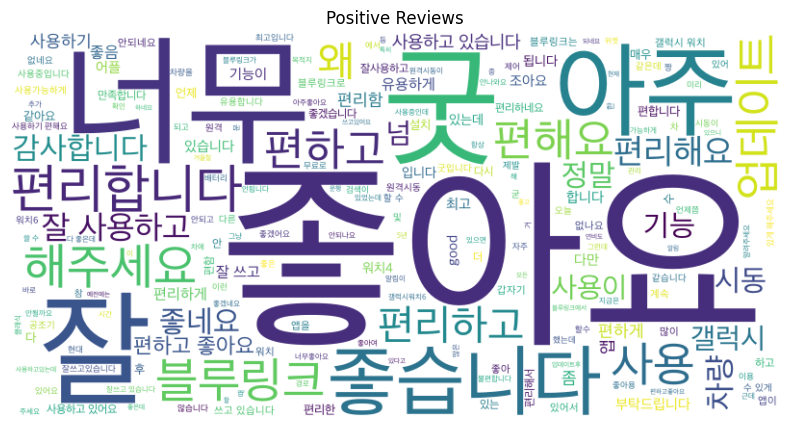

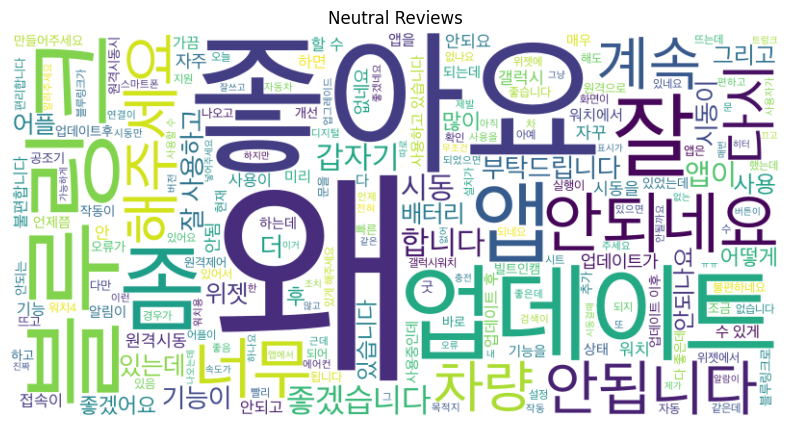

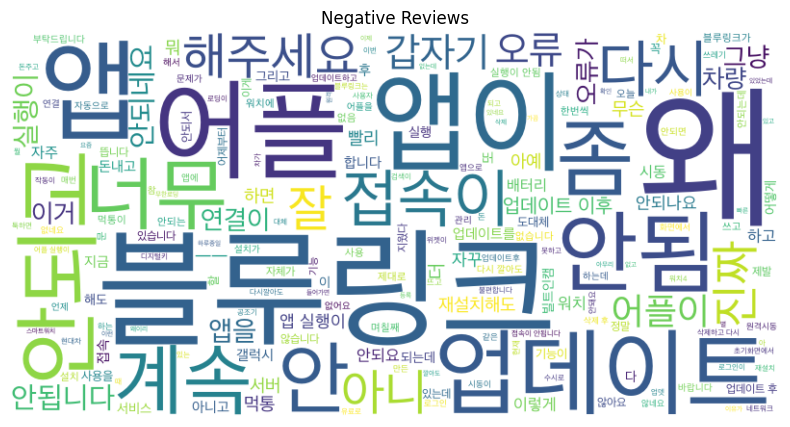

In [4]:
# 긍정 리뷰 워드 클라우드
positive_text = ' '.join(positive_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(positive_text, 'Positive Reviews')

# 중립 리뷰 워드 클라우드
neutral_text = ' '.join(neutral_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(neutral_text, 'Neutral Reviews')

# 부정 리뷰 워드 클라우드
negative_text = ' '.join(negative_reviews['content'].dropna().apply(preprocess_text))
generate_wordcloud(negative_text, 'Negative Reviews')